In [3]:
# Dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [4]:
# Store filepath in a variable
csv_import = "Resources/Seattle_abnb.csv"
initial_df = pd.read_csv(csv_import)

In [ ]:
initial_df.describe()

In [ ]:
initial_df.head()

# Property Map - Seattle

In [ ]:
#Heat Map - Property saturation by neighborhood (Caiti)
neighborhood_df=initial_df.groupby(["neighbourhood_group_cleansed","neighbourhood_cleansed"])
neighborhood_df.count()

In [ ]:
# Store latitude and longitude in locations
#locations = airport_df[["Lat", "Lng"]]

# Property Types

In [5]:
# Pie Chart - top 10 property types (Yuly)
propertytype_df=initial_df.groupby("property_type")
propertytype_df=propertytype_df.count().sort_values("id",ascending=False).reset_index()


In [6]:
propertytype_df

,property_type,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,House,1733,1733,1619,1527,1733,1733,1285,1025,1341,...,1454,1458,1456,1455,1733,1733,1733,1733,1733,1466
1,Apartment,1708,1708,1650,1404,1708,1708,1218,957,1252,...,1424,1426,1425,1425,1708,1708,1708,1708,1708,1439
2,Townhouse,118,118,118,98,118,118,92,70,97,...,80,80,80,80,118,118,118,118,118,82
3,Condominium,91,91,91,69,91,91,60,49,62,...,68,69,68,68,91,91,91,91,91,69
4,Loft,40,40,40,35,40,40,35,28,36,...,33,33,33,33,40,40,40,40,40,34
5,Bed & Breakfast,37,37,35,35,37,37,30,26,31,...,26,26,26,26,37,37,37,37,37,26
6,Other,22,22,22,20,22,22,18,16,17,...,19,19,19,19,22,22,22,22,22,19
7,Cabin,21,21,21,20,21,21,16,16,16,...,21,21,21,21,21,21,21,21,21,21
8,Bungalow,13,13,13,13,13,13,11,6,12,...,9,9,9,9,13,13,13,13,13,9
9,Camper/RV,13,13,11,10,13,13,6,6,6,...,10,10,10,10,13,13,13,13,13,10


In [12]:
#top_property['property_type']
labels

array(['House', 'Apartment', 'Townhouse', 'Condominium', 'Loft'],
      dtype=object)

<IPython.core.display.Javascript object>


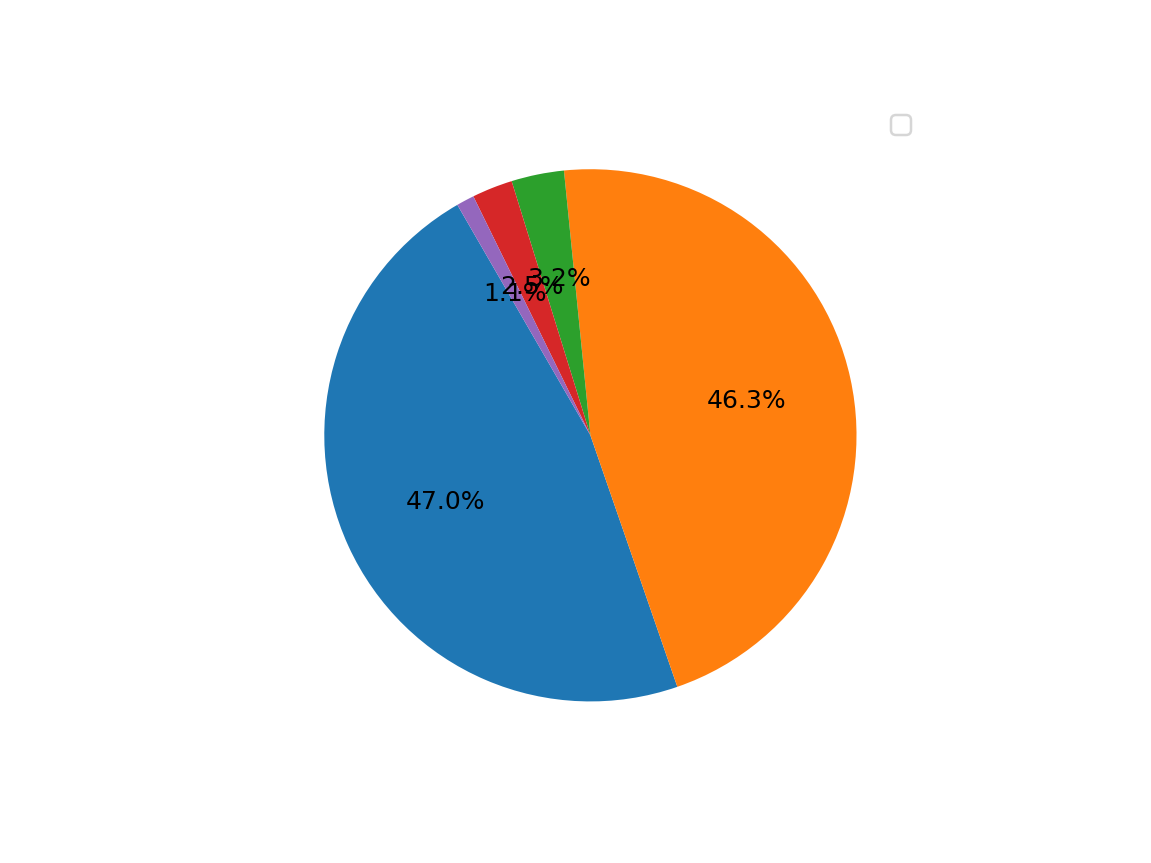

In [11]:
top_property = propertytype_df[['property_type', 'id']].head(5)
#top_property.plot(kind="pie")
labels = top_property['property_type'].values
sizes = top_property['id'].values
plt.legend(labels, loc="best")
plt.pie(sizes, autopct="%1.1f%%", startangle=120)
plt.show()

# mice_count = mice_merge_df["Sex"].value_counts()
# plt.figure()
# mice_count.plot(kind="pie", autopct='%1.1f%%')
# plt.axis("equal")
# plt.title("Distribution of Female vs Male Mice")
# plt.tight_layout()
# plt.show()

# Room Types

In [13]:
#Bar chart (caiti) - Quick'n'easy :)... explode private room & shared room to demonstrate that it is still less than 1/2 of the total listings
roomtype_df=initial_df.groupby("room_type").count().sort_values("id",ascending=False).reset_index()

In [14]:
roomtype_df.head()


,room_type,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Entire home/apt,2541,2541,2436,2187,2541,2541,1882,1444,1923,...,2121,2124,2122,2121,2541,2541,2541,2541,2541,2141
1,Private room,1160,1160,1099,966,1160,1160,834,704,885,...,948,951,950,950,1160,1160,1160,1160,1160,957
2,Shared room,117,117,106,96,117,117,70,64,76,...,91,92,91,91,117,117,117,117,117,93


<IPython.core.display.Javascript object>


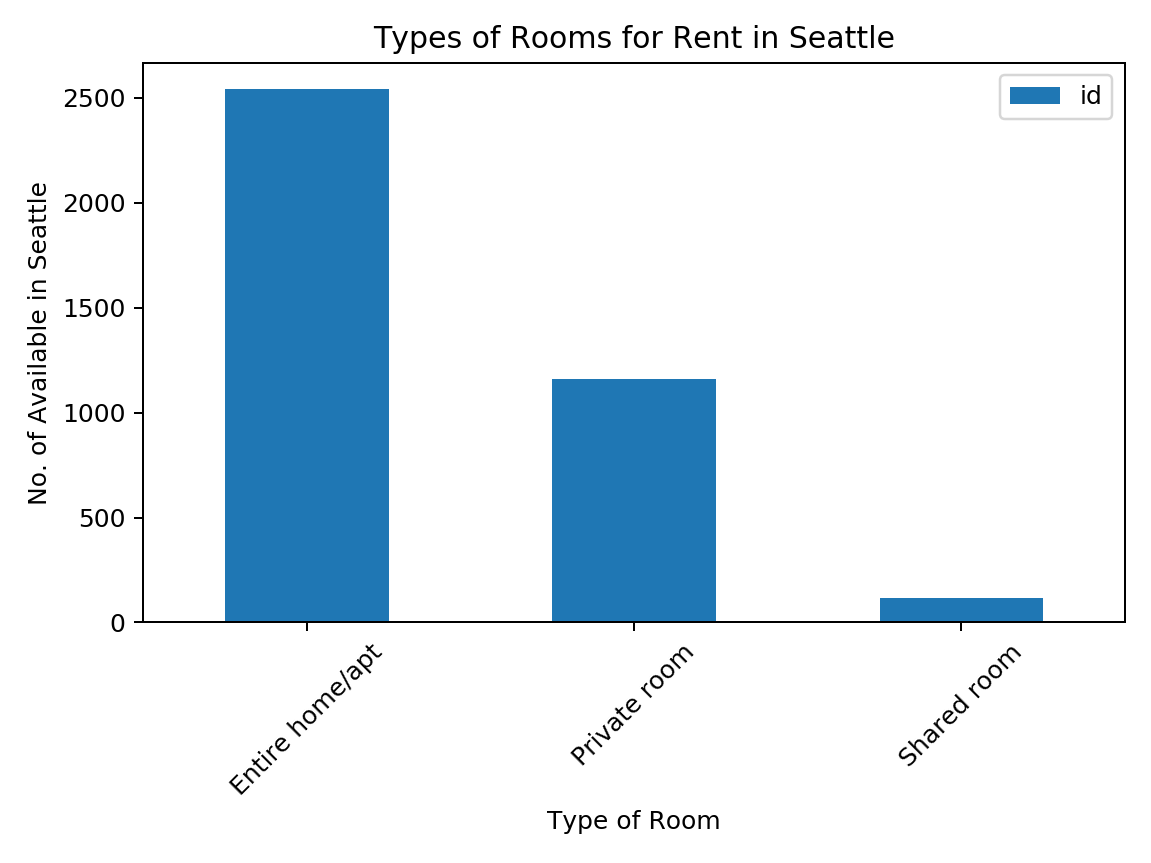

In [15]:
#Create the bar chart
roomtype = roomtype_df[['room_type', 'id']]
roomtype.plot(kind="bar", x='room_type', y='id')
plt.xticks(rotation=45)
plt.title("Types of Rooms for Rent in Seattle")
plt.xlabel("Type of Room")
plt.ylabel("No. of Available in Seattle")
plt.show()
plt.tight_layout()

# Ratings

In [ ]:
ratings_df=initial_df.groupby("review_scores_rating")
ratings_df.count().sort_values("id",ascending=False).head(10)

In [ ]:
initial_df["review_scores_rating"].min()

In [ ]:
#Binning
Rating_Bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Bin_Names=["<10", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]

#Sort Values into Bins
initial_df["Ratings Group"]=pd.cut(initial_df["review_scores_rating"],Rating_Bins, labels=Bin_Names)

In [ ]:
#Correlation to property features OR price vs rating below
Ratings_df=initial_df.groupby("Ratings Group")
Ratings_df.count()

# Pricing

In [ ]:
initial_df["price"].dtype

In [ ]:
initial_df['price'] = initial_df['price'].str.replace('$', '')
initial_df['price'] = initial_df['price'].str.replace(',', '')
initial_df['price'] = initial_df['price'].str.strip()

In [ ]:
#Price vs Rating regression
#Box & Whisker to identify general outliers
initial_df['price'] = pd.to_numeric(initial_df['price'])
initial_df["price"].describe().round(2)

# Hosts

In [16]:
initial_df["host_id"].nunique()

2751

In [30]:
#Market saturation by hosts... Bar chart- top 10 host IDs
#Marker map of top 10 hosts vs total property map
host_df=initial_df.groupby("host_id")
host_df=host_df.count().sort_values("id",ascending=False).reset_index()

In [33]:
host_df

,host_id,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Host Type
0,8534462,46,46,46,33,46,46,7,2,2,...,41,41,41,46,46,46,46,46,41,Pro Hospitality: 10+
1,4962900,39,39,39,39,39,39,39,39,39,...,37,37,37,39,39,39,39,39,37,Pro Hospitality: 10+
2,1243056,37,37,25,37,37,37,19,17,18,...,28,28,28,37,37,37,37,37,28,Pro Hospitality: 10+
3,430709,36,36,36,36,36,36,36,34,29,...,29,29,29,36,36,36,36,36,29,Pro Hospitality: 10+
4,3074414,34,34,34,34,34,34,33,31,34,...,34,34,34,34,34,34,34,34,34,Pro Hospitality: 10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,8501598,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Single Home
2747,8522646,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Single Home
2748,8523373,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,Single Home
2749,8527472,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Single Home


In [32]:
#Binning
Rating_Bins=[0, 1, 4, 9, 99999]
Bin_Names=["Single Home", "Multiple Homes: 2-4", "Amateur Hospitality: 5-9", "Pro Hospitality: 10+"]

#Sort Values into Bins
host_df["Host Type"]=pd.cut(host_df["id"],Rating_Bins, labels=Bin_Names)


In [35]:
host_df.groupby("Host Type").count()

,host_id,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
Host Type,,,,,,,,,,,,,,,,,,,,,
Single Home,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,...,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285
Multiple Homes: 2-4,420,420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420
Amateur Hospitality: 5-9,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Pro Hospitality: 10+,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [ ]:
# host = roomtype_df[['room_type', 'id']]
# roomtype.plot(kind="bar", x='room_type', y='id')
# plt.xticks(rotation=45)
# plt.title("Types of Rooms for Rent in Seattle")
# plt.xlabel("Type of Room")
# plt.ylabel("No. of Available in Seattle")
# plt.show()
# plt.tight_layout()